# Tutorial

Demonstração da utilização dos <a href="https://transparencia.sns.gov.pt/explore/?sort=title">dados disponibilizados</a> pelo <a href="https://www.sns.gov.pt/">Serviço Nacional de Saúde</a>.

O objectivo deste notebook é:

* Mostrar como obter dados utilizando a <a href="https://transparencia.sns.gov.pt/api/v1/console/datasets/1.0/search/">API</a> disponibilizada pela área de <a href="https://www.sns.gov.pt/transparencia/">Transparência do Portal do Serviço Nacional de Saúde</a>;
* Ilustrar o processo de limpeza e visualização destes dados;
* Explorar o impacto do  COVID-19 na sociedade em geral e em particular na prestação de cuidados de saúde em Portugal com questões como:
    * Como foi afectada a prestação de cuidados de oncologia?
    * Como foram afectadas as cirugias? 
    * Que impacto teve na mortalidade total em comparação com outros anos?
    * Qual o impacto da covid nas consultas médicas hospitalares e consultas em Telemedicina?
    * Como evoluiu a mobilidade dos portugueses com o aumento da fadiga pandémica? 
    * Qual o peso das condições meteorológicas na mobilidade?    
    * ...

## O que é uma API?

Os dados do portal estão disponíveis na internet para que qualquer pessoa possa encontrar, ver e descarregar os dados que pretende.

Uma API permite que um programa consiga facilmente efetuar as mesmas operações.

## Que operações estão disponíveis?

Existem neste momento duas versões da API cuja documentação pode ser consultada: a <a href="https://transparencia.sns.gov.pt/api/v1/console/datasets/1.0/search/">versão 1.0</a> e a <a href="https://transparencia.sns.gov.pt/api/v2/console">nova versão 2.0</a> que ainda está em desenvolvimento.

Ambas permitem procurar *datasets* conjuntos de dados sobre um tema específico, obter dados, procurar dados com características específicas e até efetuar algumas operações sobre os dados, por exemplo agrupá-los por ano, ou localização.

No âmbito deste tutorial, vamos utilizar a biblioteca **odsclient** que nos permite facilmente aceder aos dados do portal.

## Instalação do odsclient

A instalação desta biblioteca é muito simples:

In [10]:
!pip install odsclient[full]

  Found existing installation: importlib-metadata 1.6.0
    Uninstalling importlib-metadata-1.6.0:
      Successfully uninstalled importlib-metadata-1.6.0


# Exemplo 1 - Visualização de um dataset

Criar uma vizualização sobre a <a href="https://transparencia.sns.gov.pt/explore/dataset/numero-de-ocorrencia-com-prioridade/table/?sort=periodo">Evolução Diária das Ocorrências Pré-Hospitalares por Prioridade</a>

## 1.1 Obter os dados com odsclient

Na <a href="https://transparencia.sns.gov.pt/explore/dataset/numero-de-ocorrencia-com-prioridade/api/?sort=periodo">tab API </a> do nosso dataset podemos encontrar o nome do dataset **numero-de-ocorrencia-com-prioridade** e com ele podemos obter os dados prontos a tratar como um pandas dataframe:


In [12]:
from odsclient import get_whole_dataframe

df = get_whole_dataframe("numero-de-ocorrencia-com-prioridade", base_url="https://transparencia.sns.gov.pt/", tqdm=True)
df.head()

https://transparencia.sns.gov.pt/explore/dataset/numero-de-ocorrencia-com-prioridade/download/: 0.00B [00:00, ?B/s]


,Período,Nº Ocorrências emergentes classificadas com Prioridade 1 (Comporta risco imediato de vida e origina o envio do meio de emergência médica Suporte Avançado de Vida e/ou Suporte Imediato de Vida),Nº Ocorrências urgentes classificadas com Prioridade 3 (Origina o envio do meio de emergência médica Suporte Básico de Vida),Nº Ocorrências não urgentes classificadas com Prioridade 5 (Reencaminhada para a linha de apoio Saúde 24),Nº Ocorrências não urgentes classificadas com outras Prioridades (sem acionamento de meios)
0,2016-11-16,447.0,2535.0,258.0,137.0
1,2016-12-28,474.0,3150.0,309.0,147.0
2,2017-03-21,357.0,2415.0,297.0,140.0
3,2017-03-22,357.0,2275.0,312.0,151.0
4,2017-04-25,375.0,2134.0,247.0,119.0


In [2]:
df.describe()

,Nº Ocorrências emergentes classificadas com Prioridade 1 (Comporta risco imediato de vida e origina o envio do meio de emergência médica Suporte Avançado de Vida e/ou Suporte Imediato de Vida),Nº Ocorrências urgentes classificadas com Prioridade 3 (Origina o envio do meio de emergência médica Suporte Básico de Vida),Nº Ocorrências não urgentes classificadas com Prioridade 5 (Reencaminhada para a linha de apoio Saúde 24),Nº Ocorrências não urgentes classificadas com outras Prioridades (sem acionamento de meios)
count,1531.000000,1531.000000,1531.000000,1531.000000
mean,392.711953,2670.342913,284.527760,191.129980
std,54.241122,272.421071,72.571243,60.176642
min,119.000000,1161.000000,85.000000,70.000000
25%,359.000000,2523.000000,244.000000,154.000000
50%,389.000000,2684.000000,277.000000,179.000000
75%,427.000000,2841.000000,309.000000,210.000000
max,575.000000,3704.000000,973.000000,639.000000


# 1.2 Preparar os dados para a visualização

* Simplificar os nomes das colunas
* Tratar dos valores em falta (neste caso não existem, por isso não é necessário fazer nada)
* Corrigir o tipo dos dados
* Ordenar os dados por data


In [32]:
df.columns=["Dia","P1","P3","P5", "Outras"]

print("Valores em falta:", df.isna().sum().sum())

df = df.astype({"Dia":"datetime64", "P1":int, "P3":int,"P5":int, "Outras":int })

df.sort_values(by='Dia', inplace=True)

df.head()

Valores em falta: 0


,Dia,P1,P3,P5,Outras
104,2016-11-01,383,2261,271,138
340,2016-11-02,356,2472,336,130
12,2016-11-03,333,2567,321,124
407,2016-11-04,396,2424,278,122
91,2016-11-05,356,2192,242,119


# 1.3 Visualizar os dados

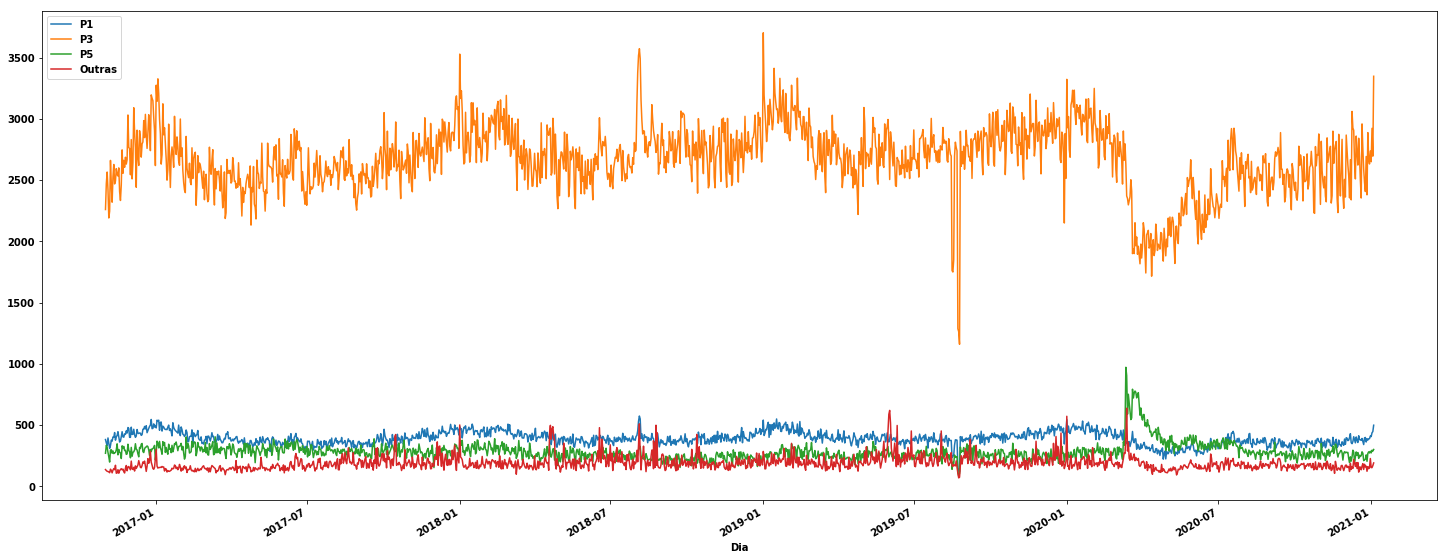

In [36]:
%matplotlib inline

df.plot(x='Dia', figsize=(25,10));